In [1]:


import better 

import numpy as np

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

class antenna:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

test = antenna(np.array([[0.0, 0.0]]), np.array([np.pi/2]), np.array([light_speed / frequency / 5e2 * 4]), np.array([[0.0,0.0]]), np.array([3.175e-3]))
delta_r = np.float64(light_speed / frequency / 5e2)

In [2]:
import matrix_elements as calc
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
impedance = calc.calculate_impedance(antenna=test, R_block=R_block, delta_r=delta_r, frequency=frequency)
incident_field = calc.calculate_field(antenna=test, R_block=R_block, driven_voltage=incident_voltage, delta_r=delta_r)
current = np.linalg.solve(impedance, incident_field)

[5]


In [3]:
print(incident_field)
print(np.abs(impedance))

[   0.            0.         2435.01789495    0.            0.        ]
[[2396.57617581 5609.15901896  855.46678125  158.17711852   42.41218154]
 [7354.12114324 2396.57617581 5609.15901896  855.46678125  158.17711852]
 [ 836.69695315 7354.12114324 2396.57617581 5609.15901896  855.46678125]
 [ 107.19212427  836.69695315 7354.12114324 2396.57617581 5609.15901896]
 [  13.81748627  107.19212427  836.69695315 7354.12114324 2396.57617581]]


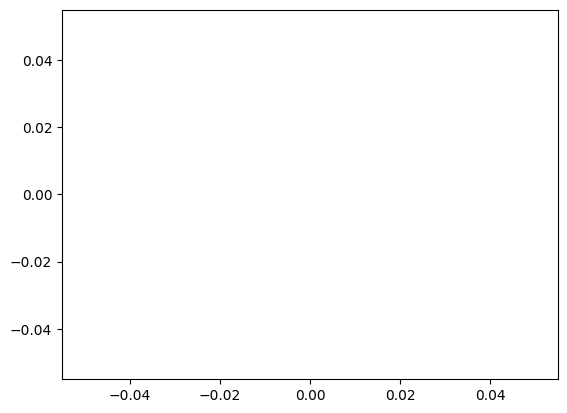

In [4]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(impedance[0][20:])), 13*np.abs(impedance[0][20:]))

In [5]:
element_num = []
for i in range (len(R_block)):
    element_num.append(len(R_block[i]))
element_num = np.array(element_num)
    
num_elements = sum(element_num)
current_block = []
cum_n = np.append(0, np.cumsum(element_num))
for i in range (len(cum_n)-1):
    current_block.append(current[cum_n[i]:cum_n[i+1]])

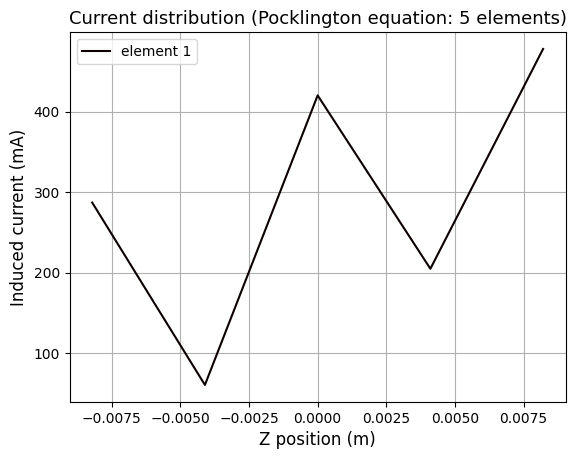

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import colormaps as cmaps
from matplotlib import colormaps as plt_cmaps
import plotly.graph_objects as go

def plot_together (R_block, element_currents) :
    cmap = plt_cmaps['hot']
    for i in range (len(R_block)):
        plt.plot(R_block[i][:,1], np.abs(element_currents[i])*1000, zorder = np.inf, label = f'element {1+i}', color = cmap((i)/len(R_block)))

    plt.title(f"Current distribution (Pocklington equation: {sum(len(element_currents[i]) for i in range(len(element_currents)))} elements)", size = 13)
    plt.ylabel("Induced current (mA)", size = 12)
    plt.xlabel("Z position (m)", size = 12)
    plt.grid(zorder = 0)
    plt.legend()
plot_together(R_block=R_block, element_currents=current_block)

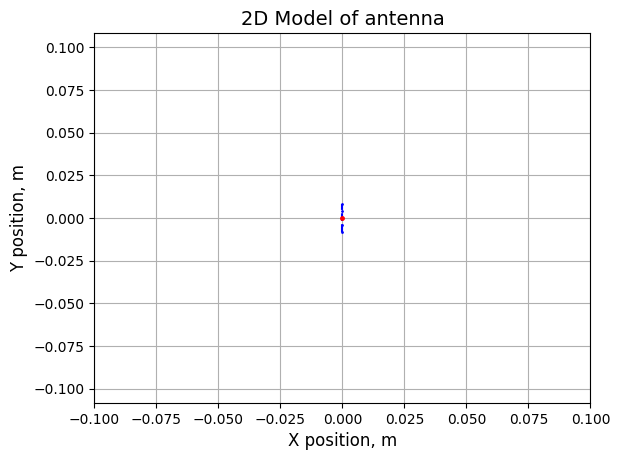

In [7]:
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
gm.plot_antenna(R_block=R_block, R=R, antenna=test, delta_r=delta_r)